In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
def first_connection(weight, tree):
    connect_pnt = np.zeros(n)
    minim = sys.maxsize
    i_min, j_min = 0, 1
    for i in range(n):
        for j in range(i+1, n):
            if minim > weight[i][j]:
                minim = weight[i][j]
                i_min, j_min = i, j
    tree[i_min][j_min] = minim
    tree[j_min][i_min] = minim
    weight[i_min][j_min] = sys.maxsize
    weight[j_min][i_min] = sys.maxsize
    connect_pnt[i_min] = connect_pnt[j_min] = 1
    return connect_pnt

In [4]:
def lync_all(weight, tree, connect_pnt):
    minim = sys.maxsize
    i_min, j_min = None, None
    for i in range(n):
        if connect_pnt[i] == 1:
            for j in range(n):
                if connect_pnt[j] == 0:
                    if minim > weight[i][j]:
                        minim = weight[i][j]
                        i_min, j_min = i, j
    tree[i_min][j_min] = minim
    tree[j_min][i_min] = minim
    weight[i_min][j_min] = sys.maxsize
    weight[j_min][i_min] = sys.maxsize
    connect_pnt[i_min] = connect_pnt[j_min] = 1

In [5]:
def delete_connection(tree):
    maxim = 0
    i_max, j_max = 0, 0
    for i in range(n):
        for j in range(i+1, n):
            if tree[i][j] > maxim:
                maxim = tree[i][j]
                i_max, j_max = i, j
    tree[i_max][j_max] = tree[j_max][i_max] = 0

In [6]:
def cluster(cl, tree, clust_pnt): 
    clust = []
    for i in range(n): 
        for j in range(n): 
            if tree[i][j] == 0: 
                continue
            if len(clust) == 0:
                clust.append(i)
                clust.append(j)
                tree[i][j] = tree[j][i] = 0 
    m = clust[0]
    old_m = -1
    while old_m != m:
        old_m = m
        for j in range(n):
            if tree[m][j] == 0: 
                continue
            else:
                clust.append(j)
                tree[m][j] = tree[j][m] = 0
                m = j
    m = clust[1]
    old_m = -1
    while old_m != m:
        old_m = m
        for j in range(n):
            if tree[m][j] == 0: 
                continue
            else:
                clust.append(j)
                tree[m][j] = tree[j][m] = 0
                m = j
    for i in clust:
        clust_pnt[i] = cl

In [7]:
def plot_graph(tree, n):
    G = nx.Graph(strict=False)
    for i in range(n):
        G.add_node(i)
    for i in range(n):
        for j in range(n):
            if tree[i][j] != 0:
                G.add_edge(i,j, weight=tree[i][j])
                G.add_edges_from([(i, j, {'weight': tree[i][j]})])
                tree[i][j] = tree[j][i] = 0 
    nx.draw_circular(G, with_labels=True)
    pos = nx.circular_layout(G)
    edge_labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels = edge_labels)

In [8]:
def knp(weight, n, k):
    tree = [[0 for i in range(n)] for j in range(n)]
    connect_pnt = first_connection(weight, tree)
    while 0 in connect_pnt:
        lync_all(weight, tree, connect_pnt)
    for i in range(k-1):
        delete_connection(tree)
    clust_pnt = np.zeros(n)
    old_tree = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            old_tree[i][j] = tree[i][j]
    for i in range(1, k):
        cluster(i, tree, clust_pnt)
    plot_graph(old_tree, n)
    return clust_pnt

Пример

In [11]:
n, k = 10, 2

weight = [[0 for i in range(n)] for j in range(n)]
for i in range(n):
    for j in range(i + 1, n):
        weight[i][j] = np.random.randint(1, 100)
        weight[j][i] = weight[i][j]
        
weight

[[0, 37, 94, 25, 95, 59, 82, 55, 3, 13],
 [37, 0, 28, 1, 49, 34, 47, 52, 44, 93],
 [94, 28, 0, 94, 5, 32, 83, 35, 9, 81],
 [25, 1, 94, 0, 72, 14, 99, 72, 38, 79],
 [95, 49, 5, 72, 0, 91, 89, 26, 14, 66],
 [59, 34, 32, 14, 91, 0, 4, 80, 56, 73],
 [82, 47, 83, 99, 89, 4, 0, 16, 35, 77],
 [55, 52, 35, 72, 26, 80, 16, 0, 31, 85],
 [3, 44, 9, 38, 14, 56, 35, 31, 0, 31],
 [13, 93, 81, 79, 66, 73, 77, 85, 31, 0]]

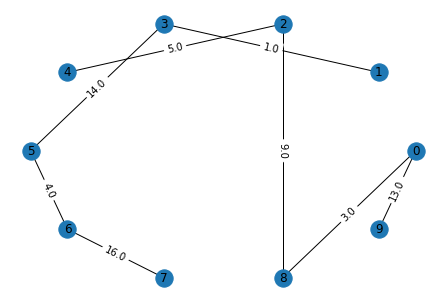

In [12]:
clust_pnt = knp(weight, n, k)

In [13]:
clust_pnt

array([1., 0., 1., 0., 1., 0., 0., 0., 1., 1.])